In [1]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) to predict the closing 
#stock price of a corporation(Apple Inc.) using the past 60 days stock price.

In [2]:
#Import the libraries
import math
#import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

ImportError: cannot import name 'artist' from 'matplotlib' (C:\Users\ABOVE ALL OMOLERE\Data_Science_64\lib\site-packages\matplotlib\__init__.py)

In [2]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end ='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540049
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607439
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426811
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596107
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501358


In [ ]:
!pip install --upgrade pandas-datareader

In [3]:
#Geting the number of rows and columns
df.shape

(2003, 6)

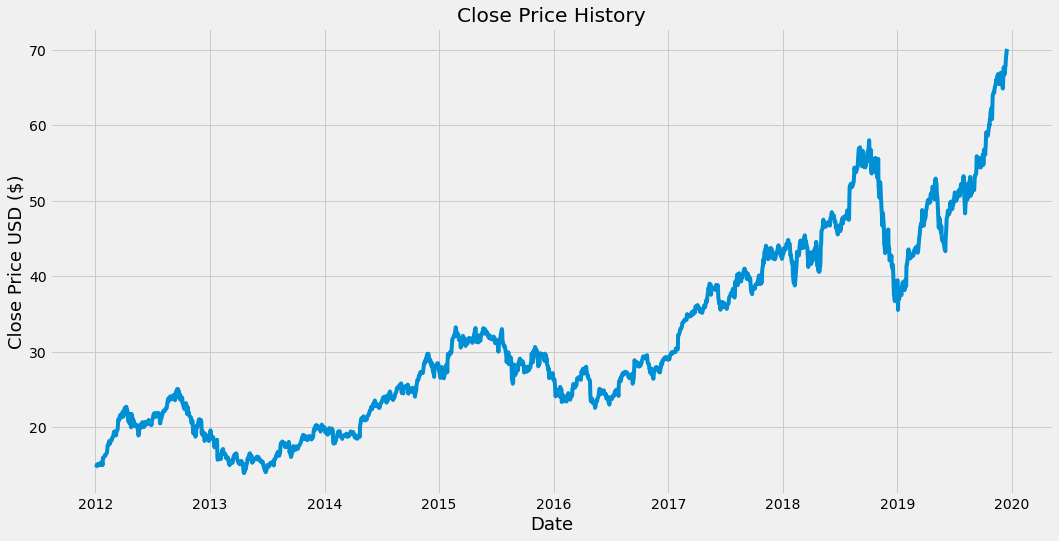

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()
#Observation: We see that the stock has been increasing over time 

In [5]:
#Create a new dataframe with only the "Close Column"
data = df.filter(["Close"])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)


In [6]:
training_data_len

1603

In [7]:
#Scaling the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [8]:
#Create the training data set
#create the scaled training datset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(X_train)
    print(y_train)
    print()


[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [9]:
#Convert the x_train and y_train to the numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
#Reshape the data. The LSTM model expect the impute to be three dimensional and right now our x_train dimension is 2dimensional as we see with the shape functions.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1543, 60, 1)

In [11]:
#BUILDING THE lSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer="adam", loss = "mean_squared_error")
#an optimizer improves upon the loss function , while the loss function measures how well the model did on training
#

In [13]:
#Training the model. Fit is another word for train
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

1543/1543 [==============================] - 58s 36ms/step - loss: 5.9630e-04


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data to a numpy array
X_test = np.array(X_test)


In [16]:
#Reshape the data because the LSTM model expects a 3 dimensional shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # args--->the number of rows, the number of columns, the feature ["closing"]

In [17]:
#Get the models predicted price values
predictions = model.predict(X_test)
#we want predictions to contains the same value as our y_test dataset
predictions = scaler.inverse_transform(predictions)


In [18]:
#Evaluating the model. Using the RMSE(Root Mean Squared Error)
#lower values of RMSE indicates  a better fit
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

2.0645172786712647

In [19]:
#PLotting the data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


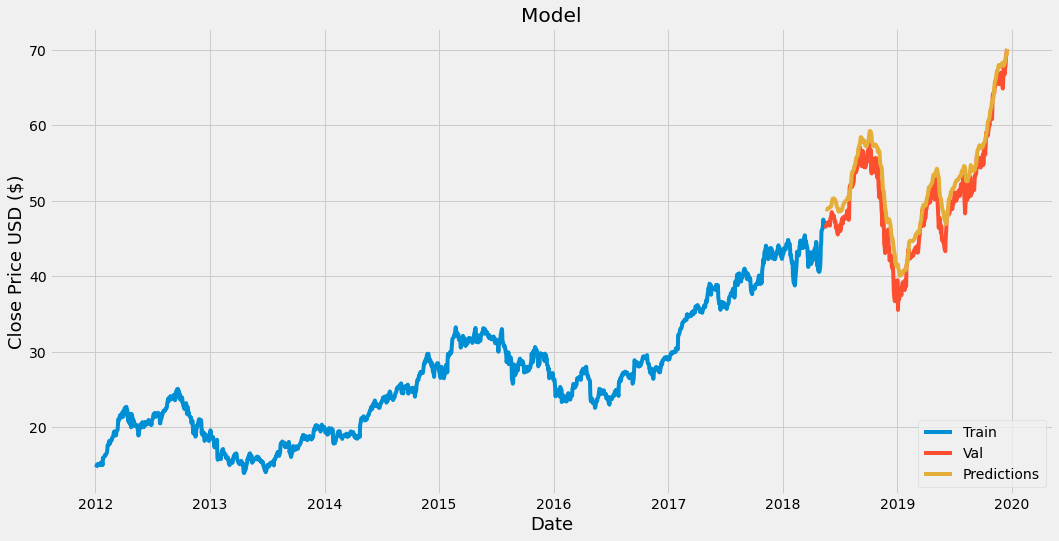

In [20]:
train = data[: training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#Visualizing the plot
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [25]:
#Show the Valid and Predicted Prices.
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,48.926434
2018-05-18,46.577499,48.908363
2018-05-21,46.907501,48.850464
2018-05-22,46.790001,48.846565
2018-05-23,47.090000,48.852367
...,...,...
2019-12-11,67.692497,68.644409
2019-12-12,67.864998,68.910713
2019-12-13,68.787498,69.173592


In [27]:
#Get the quote
apple_quote = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end = "2019-12-17")

In [31]:
#Creating a new_dataframe:
new_df = apple_quote.filter(["Close"])
#Get the last 60 days closing price value and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test_new = []
#Append the past 60 days
X_test_new.append(last_60_days_scaled)
#Convert the X_test_data set to a numpy array
X_test_new = np.array(X_test_new)
#Reshape the data
X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test_new)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[70.61689]]


In [32]:
apple_quote2 = web.DataReader("AAPL", data_source="yahoo", start="2019-12-18", end = "2019-12-18")

In [33]:
print(apple_quote2["Close"])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
